___
# Linear Regression Model
___

A linear regression model created using scikit-learn that predicts housing prices. This model takes a bunch of few features of a house and
returns back an estimate of what the house would sell for. I have used the BOSTON HOUSING DATASET from scikit-learn package for prediction analysis.

In [2]:
# importing the dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Get the Data 

In [3]:
# load the Boston Housing Dataset from sklearn.datasets 
from sklearn.datasets import load_boston
boston = load_boston()
print(boston) #view the data

## Training a Linear Regression Model

Now after loading and checking the data we have to train out regression model ! For this we need to first split up our data into an 'X' array that contains the features to train on, and a 'y' array with the target variable.

** Note : We will first need to transform the Dataset into a DataFrame

### X and y arrays

In [4]:
# transforming dataset into dataframe
X=pd.DataFrame(boston.data,columns=boston.feature_names)
X.describe() #check out various stats of the data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [5]:
y=pd.DataFrame(boston.target)
y.head() #check out the head of the y dataframe

,0
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


## Train Test Split

Now let's split the data into a training set and a testing set. We will train out model on the training set and then use the test set to evaluate the model.

In [1]:
# importing dependencies for training and testing
from sklearn.model_selection import train_test_split

In [ ]:
# I have split the data into 2/3rd(approx 67%) as training set and 1/3rd(approx 33%) as testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

## Creating and Training the Model

In [8]:
# importing dependencies for linear regression
from sklearn.linear_model import LinearRegression

In [9]:
# initialising the linear regression model
reg = LinearRegression()

In [10]:
# train the model with our training data
reg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

## Model Evaluation

Let's evaluate the model by checking out it's coefficients and how we can interpret them.

In [11]:
# print the intercept
print(reg.intercept_)

[33.33497576]


In [12]:
# print the coeficient for each feature of our model
print(reg.coef_)

[[-1.28749718e-01  3.78232228e-02  5.82109233e-02  3.23866812e+00
  -1.61698120e+01  3.90205116e+00 -1.28507825e-02 -1.42222430e+00
   2.34853915e-01 -8.21331947e-03 -9.28722459e-01  1.17695921e-02
  -5.47566338e-01]]


In [13]:
# creating a dataframe for each feature and its coefficient for better understanding
coeff_df = pd.DataFrame(reg.coef_[0],X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.128750
ZN,0.037823
INDUS,0.058211
CHAS,3.238668
NOX,-16.169812
RM,3.902051
AGE,-0.012851
DIS,-1.422224
RAD,0.234854
TAX,-0.008213


## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [14]:
# predict the model using the 1/3rd dataset we allocated earlier for testing
predictions = reg.predict(X_test)

In [ ]:
print(predictions) #check out your predicted values

In [ ]:
print(y_test) # check out the actual values

### Lets create visualisation for our original and predicted values

#### Scatter Plot

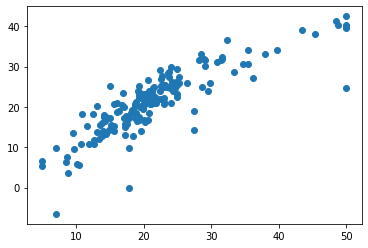

In [15]:
plt.scatter(y_test,predictions)

#### Residual Histogram

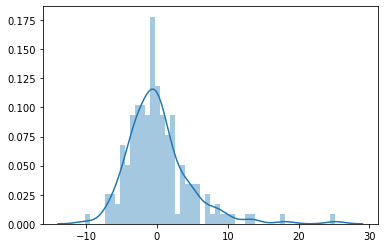

In [16]:
sns.distplot((y_test-predictions),bins=50)

## Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$${\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [17]:
# importing dependencies for metrics
from sklearn import metrics

In [18]:
# calculating the error metric for the predicted model
print('Mean Absolute Error for the predicted model is :', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error for the predicted model is :', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error for the predicted model is :', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error for the predicted model is : 3.1482557548168053
Mean Squared Error for the predicted model is : 20.724023437339685
Root Mean Squared Error for the predicted model is : 4.552364598463054


### This prediction model has been trained using Linear Regression !